In [2]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
from __future__ import print_function

%matplotlib inline

In [3]:
f1 = 256.0  # Hz
lb = 10.0    # Hz

In [4]:
npts = 512
aq = 0.256
ttt = np.linspace(0,aq,npts)
ttt2 = np.linspace(0,2*aq,2*npts)
dt = aq/npts
sw =1./dt
print( "spectral width = ", sw)
print( "dwell time (s) = ", dt)

frq = np.linspace(-sw/2,sw/2, npts)

spectral width =  2000.0
dwell time (s) =  0.0005


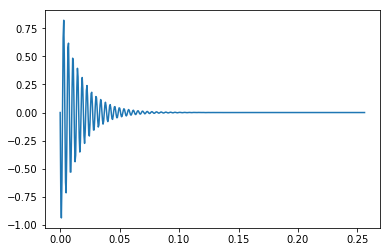

In [5]:
phi=np.pi/2.

plt.plot( ttt, np.cos(phi+2*np.pi*f1*ttt)*np.exp(-ttt*lb*2*np.pi));

In [6]:
phi=np.pi/2.
rrr = np.cos(phi+2*np.pi*f1*ttt2[0:npts+0])*np.exp(-ttt*lb*2*np.pi)
iii = np.sin(phi+2*np.pi*f1*ttt2[0:npts+0])*np.exp(-ttt*lb*2*np.pi)

In [7]:
fid = rrr+1j*iii

In [8]:
sss = fftpack.fft(fid)

In [9]:
sss = fftpack.fftshift(sss)

In [10]:
exp_linebroadening = np.exp(-ttt*lb*2*np.pi)

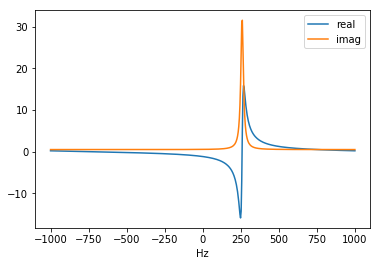

In [12]:
plt.plot(frq,sss.real, label='real')
plt.plot(frq,sss.imag, label='imag')
plt.legend()
plt.xlabel("Hz");

In [13]:
fid1 =np.zeros((npts,npts), dtype=np.complex128)
fid2 =np.zeros((npts,npts), dtype=np.complex128)

In [14]:
phi1=0.0
phi2=np.pi/2.
for i in range(npts):
    fid1[i] =(np.cos(phi1+2*np.pi*f1*ttt2[i:npts+i])+1j*np.sin(phi1+2*np.pi*f1*ttt2[i:npts+i]))*exp_linebroadening    
    fid2[i] = (np.cos(phi2+2*np.pi*f1*ttt2[i:npts+i])+1j*np.sin(phi2+2*np.pi*f1*ttt2[i:npts+i]))*exp_linebroadening

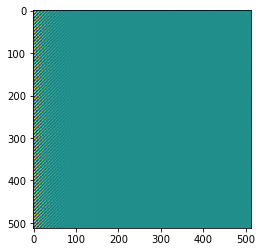

In [15]:
plt.imshow(fid1.real)

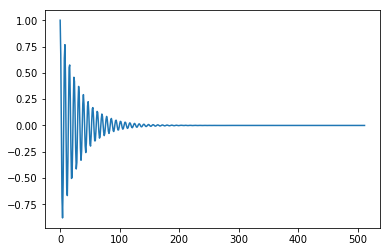

In [16]:
plt.plot(fid1[0].real)

In [17]:
spec1 = fftpack.fft(fid1, axis=1)
spec1 = fftpack.fftshift(spec1, axes=1)

spec2 = fftpack.fft(fid2, axis=1)
spec2 = fftpack.fftshift(spec2, axes=1)

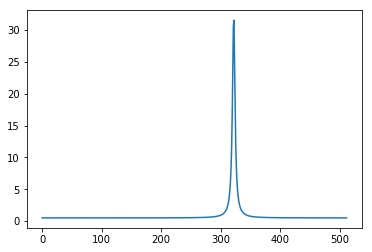

In [18]:
plt.plot(spec1[0].real)

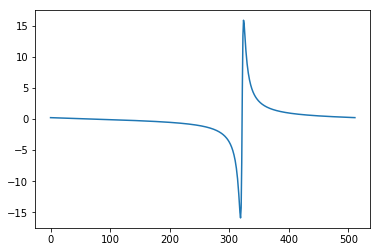

In [19]:
plt.plot(spec2[0].real)

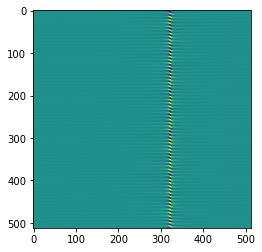

In [20]:
plt.imshow(spec1.real)

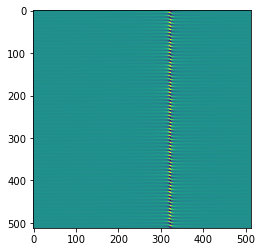

In [21]:
plt.imshow(spec2.real)

In [22]:
spec = spec1.real+1j*spec2.real

In [23]:
spec = spec * exp_linebroadening[:,np.newaxis]

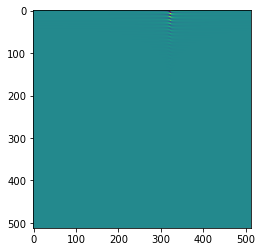

In [24]:
plt.imshow(spec.real)

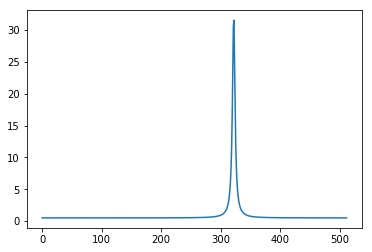

In [25]:
plt.plot(spec[0].real)
    

In [26]:

spec = fftpack.fftshift(fftpack.fft(spec, axis=0), axes=0)

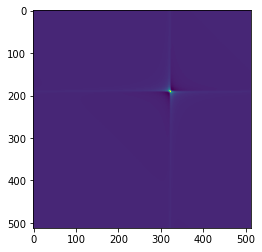

In [28]:
plt.imshow(spec.real)

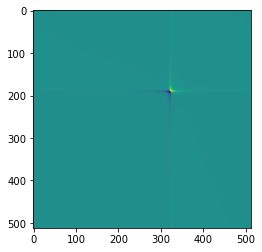

In [29]:
plt.imshow(spec.imag)

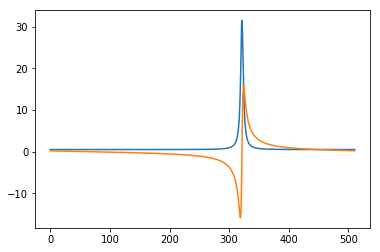

In [209]:
plt.plot(spec_T[:,0].real)
plt.plot(spec_T[:,0].imag)